# Пиксельная маска части изображения

## Дано:
- изображение (формат jpg/png)


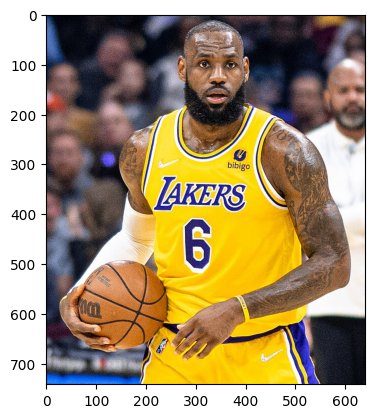

In [7]:
from skimage.io import imread
import matplotlib.pyplot as plt

img_input = imread('https://upload.wikimedia.org/wikipedia/commons/thumb/7/7a/LeBron_James_%2851959977144%29_%28cropped2%29.jpg/640px-LeBron_James_%2851959977144%29_%28cropped2%29.jpg')
plt.imshow(img_input)

- диапазон строк для маски (y_min, y_max)
- диапазон столбцов для маски (x_min, x_max)
- число разбиений на области (h, например, для h=10 маска разбивается на 10*10=100 равных областей)

In [16]:
color_average_settings = {
    'y_min': 10,
    'y_max': 220,
    'x_min': 260,
    'x_max': 420,
    'h': 20
}

## Требуется:
написать алгоритм усреднения цвета в каждой области (усреднение по каждому цветовому каналу: R,G,B)

Алгоритм

In [10]:
import numpy as np
def color_average__lebron_face(img, y_min, y_max, x_min, x_max, h):
    blurry_img = img.copy()

    # размеры области, которую будем блюрить
    area_height = (y_max - y_min) // h
    area_width = (x_max - x_min) // h

    for i in range(h):
        for j in range(h):
            area_x0, area_y0 = x_min + j * area_width, y_min + i * area_height
            area_x1, area_y1 = area_x0 + area_width, area_y0 + area_height

            blurry_img[area_y0:area_y1, area_x0:area_x1] = np.mean(blurry_img[area_y0:area_y1, area_x0:area_x1])

    return blurry_img

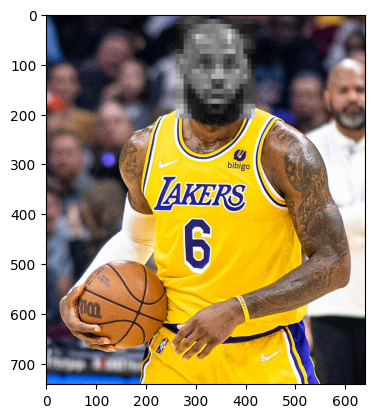

In [17]:
img_output = color_average__lebron_face(img_input, **color_average_settings)
plt.imshow(img_output)
plt.show()